In [1]:
import numpy as np
import networkx as nx
import pygad
from core_periphery import Stochastic_Block_Model

# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)
n = A.shape[0]

# Initialize the SBM class with the adjacency matrix
sbm = Stochastic_Block_Model(G, A)

# Parameters for Borgatti and Everett correlation optimization
ga_instance_borgatti = pygad.GA(
    num_generations=1000,
    num_parents_mating=5,
    fitness_func=sbm.fitness_function_borgatti_everett,
    sol_per_pop=20,
    num_genes=n,
    gene_type=float,
    gene_space=[0, 1],  # Genes will be floats between 0 and 1
    mutation_type="random",
    mutation_percent_genes=10,
)

# Run the genetic algorithm for Borgatti and Everett correlation
ga_instance_borgatti.run()

# Get the best solution for Borgatti and Everett correlation
solution_borgatti, solution_fitness_borgatti, solution_idx_borgatti = ga_instance_borgatti.best_solution()
best_core_indices_borgatti = [i for i, gene in enumerate(solution_borgatti) if gene > 0.5]
ρ = sbm.borgatti_everett_correlation(best_core_indices_borgatti)

print("-----------------------------")
print("*** Borgatti Everett")
print(f"Best core indices (Borgatti and Everett): {best_core_indices_borgatti}")
print(f"Maximum Borgatti and Everett correlation ρ: {ρ}")

# Parameters for Brusco metric optimization
ga_instance_brusco = pygad.GA(
    num_generations=1000,
    num_parents_mating=5,
    fitness_func=sbm.fitness_function_brusco_metric,
    sol_per_pop=20,
    num_genes=n,
    gene_type=float,
    gene_space=[0, 1],  # Genes will be floats between 0 and 1
    mutation_type="random",
    mutation_percent_genes=10,
)

# Run the genetic algorithm for Brusco metric
ga_instance_brusco.run()

# Get the best solution for Brusco metric
solution_brusco, solution_fitness_brusco, solution_idx_brusco = ga_instance_brusco.best_solution()
best_core_indices_brusco = [i for i, gene in enumerate(solution_brusco) if gene > 0.5]
Z = sbm.brusco_metric(best_core_indices_brusco)
print("-----------------------------")
print("*** Brusco")
print(f"Best core indices (Brusco): {best_core_indices_brusco}")
print(f"Maximum Brusco metric Z: {Z}")

/Users/jeongjin/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


-----------------------------
*** Borgatti Everett
Best core indices (Borgatti and Everett): [0, 2, 32, 33]
Maximum Borgatti and Everett correlation ρ: 0.4234938453354855


/Users/jeongjin/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


-----------------------------
*** Brusco
Best core indices (Brusco): [33]
Maximum Brusco metric Z: 467


In [2]:
from core_periphery import Transport
from core_periphery import Rossa
from core_periphery import Minre
from core_periphery import Lip
from core_periphery import Rombach

# Example usage
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)
n = A.shape[0]
tp = Transport(G, A)
metric, best_cores, r = tp.holme_metric(G, 1000)

print("-----------------------------")
print("*** Holme")
print(f"Best core indices (Holme): {best_cores}")
print(f"Holme Metric: {metric}")
print(r)
print("-----------------------------")
metric, best_cores, coef = tp.silva_core_coefficient(G)

print("*** Silva")
print(f"Best core indices (Silva): {best_cores}")
print(f"Silva Metric (Core Coefficient): {metric}")
print(f"Silva Metric (coef): {coef}")

print("-----------------------------")

print("*** Rossa")
rossa = Rossa(G)
alpha = rossa.get_alpha()
cp_centralization = rossa.get_cp_centralization()
z_score = rossa.calculate_z_score(num_randomizations=100)
core_nodes = rossa.extract_core_nodes(0.7)
#print("Alpha values:", alpha)
print("CP-Centralization:", cp_centralization)
print("Z-Score:", z_score)
print("Core nodes (threshold={}):".format(0.7), core_nodes)

print("-----------------------------")

print("*** Minre")
model = Minre(G, A)
w, best_cores, pre = model.minres()

print("Core Nodes:", best_cores)
print("Proportional Reduction of Error (PRE):", pre)

print("-----------------------------")

print("*** Lip")
model = Lip(G, A)
z_influence, cores, z = model.calculate()

print("Core Nodes:", cores)
print("Z index:", z)


print("-----------------------------")

print("*** Rombach")
model = Rombach(G, A)
best_order, core_scores_optimized, result, R_gamma = model.optimize()

print("best_order:", best_order)
print("Core Nodes:", result)
print("core_scores_optimized:", core_scores_optimized)
print("R_Gamma index:", R_gamma)

-----------------------------
*** Holme
Best core indices (Holme): [0, 1, 2, 3, 32, 33, 7, 8, 13, 30]
Holme Metric: 21.476859947181303
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
-----------------------------
*** Silva
Best core indices (Silva): [0, 2, 33, 31, 8, 13]
Silva Metric (Core Coefficient): 0.8235294117647058
Silva Metric (coef): {0: 276.01666666666574, 2: 189.26666666666665, 33: 167.60000000000002, 31: 122.68333333333341, 8: 103.59285714285718, 13: 94.09285714285716, 32: 86.2428571428572, 19: 35.083333333333336, 1: 31.25000000000001, 3: 20.250000000000004, 27: 17.749999999999996, 30: 14.416666666666664, 28: 14.416666666666664, 7: 14.416666666666664, 9: 14.416666666666664, 23: 14.416666666666664, 5: 10.0, 6: 6.333333333333333, 29: 3.0, 4: 2.0, 10: 1.0, 17: 1.0, 21: 1.0, 24: 1.0, 25: 0.0, 12: 0.0, 14: 0.0, 15: 0.0, 18: 0.0, 20: 0.0, 22: 0.0, 11: 0.0, 26: 0.0, 16: 0.0}
----------------------------

*** KM_ER
Core Nodes: {0: [0, 1, 2, 3], 1: [4, 5, 6], 2: [32, 33], 3: [23, 24]}
Q_cp index: 44.85026737967909
Q_c index: [18.27272727  4.7486631  18.52406417  3.30481283]
Significant cores: [0, 1, 2, 3]
Total Q_cp_BE: 0.003031410408506986
-----------------------------


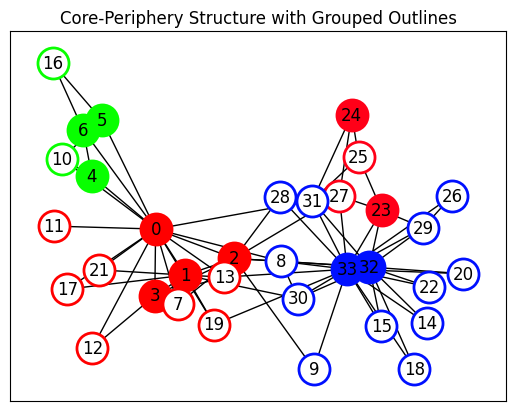

In [21]:
from core_periphery import KM_ER
import numpy as np
import networkx as nx
import pygad
from core_periphery import Stochastic_Block_Model

# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)

n = A.shape[0]


print("*** KM_ER")
model = KM_ER(G, A)
c, x, Qcp, Qc = model.optimize( max_updates=1000)

multi_cores = dict()
for i in range(len(x)):
    if c[i] not in multi_cores:
        multi_cores[c[i]] = []  # Correctly initialize a list for the new key
    if x[i] == 1:
        multi_cores[c[i]].append(i)  # Append the node index i to the list for core c[i]

print("Core Nodes:", multi_cores)
print("Q_cp index:", Qcp)
print("Q_c index:", Qc)
significant_cores, total_Q_cp_BE = model.calculate_multi_core_Q_cp_BE(c, x)

print("Significant cores:", significant_cores)
print("Total Q_cp_BE:", total_Q_cp_BE)

print("-----------------------------")

model.visualize_core_periphery(c, x)

*** KM_Config
Core Nodes: {0: [0, 1, 2, 3], 1: [10], 2: [5, 16], 3: [8, 14, 15, 18, 20, 22, 23, 24, 29, 30, 31, 33]}
Q_cp index: 2.101495726495727
-----------------------------


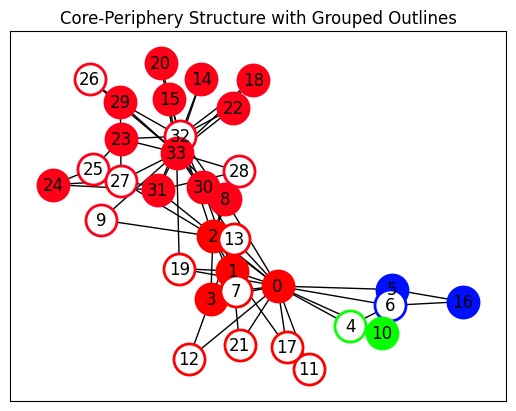

In [42]:
from core_periphery import KM_Config


# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)

n = A.shape[0]


print("*** KM_Config")
model = KM_Config(G, A)
c, x, Qcp = model.optimize( max_updates=1000)

multi_cores = dict()
for i in range(len(x)):
    if c[i] not in multi_cores:
        multi_cores[c[i]] = []  # Correctly initialize a list for the new key
    if x[i] == 1:
        multi_cores[c[i]].append(i)  # Append the node index i to the list for core c[i]

print("Core Nodes:", multi_cores)
print("Q_cp index:", Qcp)
# significant_cores, total_Q_cp_BE = model.calculate_multi_core_Q_cp_BE(c, x)

# print("Significant cores:", significant_cores)
# print("Total Q_cp_BE:", total_Q_cp_BE)

print("-----------------------------")

model.visualize_core_periphery(c, x)

In [3]:

from core_periphery import Lap_Core
import numpy as np
import networkx as nx

G = nx.karate_club_graph()
model = Lap_Core(G)

scores, core_set, q = model.low_rank_core()
print(scores)
print("Best division (0: periphery, 1: core):", core_set)
print("Best q value:", q)



[[3.98911103+0.j 3.93544707+0.j 3.99707695+0.j ... 0.28166539+0.j
  0.367646  +0.j 0.55361052+0.j]
 [3.93544707+0.j 3.88439566+0.j 3.92923609+0.j ... 0.2224994 +0.j
  0.27302413+0.j 0.45138243+0.j]
 [3.99707695+0.j 3.92923609+0.j 4.10976335+0.j ... 0.69433276+0.j
  1.03573396+0.j 1.26005673+0.j]
 ...
 [0.28166539+0.j 0.2224994 +0.j 0.69433276+0.j ... 1.64188468+0.j
  2.6525854 +0.j 2.81522808+0.j]
 [0.367646  +0.j 0.27302413+0.j 1.03573396+0.j ... 2.6525854 +0.j
  4.28738534+0.j 4.54664077+0.j]
 [0.55361052+0.j 0.45138243+0.j 1.26005673+0.j ... 2.81522808+0.j
  4.54664077+0.j 4.82834717+0.j]]
[19 18 23 14  6  6  6 13 17  1  4  3  3 16  6 11  0  3  3  6  4  6  6 18
  3 13  4 12  4 13 15 16 20 22]
Best division (0: periphery, 1: core): {32, 33, 2, 0, 1}
Best q value: 0.7256157635467981


In [7]:
for i in core_set:
    print(i)

32
33
2
0
1


In [7]:
from core_periphery import Surprise
import networkx as nx
# Example usage

G = nx.karate_club_graph()  # 사용할 그래프 정의 (예: Karate Club 그래프)
A = nx.to_numpy_array(G)

model = Surprise(G, A)
best_x, core_set, best_q = model.core_periphery_optimization(iterations=2)

print("Best division (0: periphery, 1: core):", core_set)
print("Best MEH value:", best_q)



Best division (0: periphery, 1: core): [ 0  1  2 32 33]
Best MEH value: 9.489957615359026e-26
